In [2]:
import sys
sys.path.append('..\\')

from ESP301Control import RotationStage

In [8]:
stage = RotationStage()
stage.connect()

0

In [6]:
stage.moveRelative(-30)

0

In [11]:
stage.moveAbsolute(1)

0

In [15]:
stage.getVelocity()

2.0

In [16]:
stage.getAngle()

0.0

In [12]:
stage.resetToHome()

0

In [21]:
stage.disconnect()

0

## Old Stuff

In [1]:
import sys
import clr
import numpy as np
import matplotlib.pyplot as plt
import datetime

#sys.path.append(r'C:\Newport\Motion Control\ESP301\Bin')
#sys.path.append('..\\')
# Found this just by searching "CommandInterface" in Windows Explorer,
# no idea why it is here :/
#interfacePath = r'C:\Windows\Microsoft.NET\assembly\GAC_64'#\Newport.ESP301.CommandInterface\v4.0_2.0.0.3__9f994642f5b48132'
#sys.path.append(interfacePath)
#print(clr.FindAssembly(r'C:\Newport\Motion Control\ESP301\Bin\CommandInterface'))
clr.AddReference(r'ESP301_CommandInterface')

from CommandInterfaceESP301 import *

In [2]:
COM_PORT = 'COM4'
BAUDRATE = 921600

In [12]:
espDev = ESP301()

# Doesn't show anything, connection still works though :/
print(espDev.GetDevices())

# ret = 0 means success
ret = espDev.OpenInstrument(COM_PORT, BAUDRATE)
print(ret)

System.String[]
0


In [13]:
# The interface mostly using out parameters (as well as returns I think?)
errorMsg = ''
axisNum = 1
angle = 0
# Grab the current position (angle)
status, angle, errorMsg = espDev.TP(axisNum, angle, errorMsg)

print(angle)

0.0


In [35]:
# Move the stage
dtheta = 1 # In degrees
status, errorMsg = espDev.PA_Set(axisNum, dtheta, errorMsg)

print('before wait')
# Wait for the stage to finish moving
# There is an ASCII command just for this (WS), but it doesn't work ???
# so I do it this way
while True:
    ret, done, errorMsg = espDev.MD(axisNum, 0, errorMsg)
    if done:
        break
print('after wait')

before wait
after wait


In [40]:
status = espDev.OR(axisNum, 0, errorMsg)
print(status)

(0, '')


In [39]:
# Set the home position relative to the current one
errorMsg = ''
axisNum = 1
angle = 0
# Grab the current position (angle)
status, angle, errorMsg = espDev.TP(axisNum, angle, errorMsg)

status = espDev.SH_Set(axisNum, 0, errorMsg)
print(status)

(0, '')


In [30]:
status = espDev.VA_Set(axisNum, 3, errorMsg)
print(status)

(0, '')


In [29]:
status = espDev.VA_Get(axisNum, 3, errorMsg)
print(status)

(0, 1.0, '')


In [16]:
def millisTime():
    return int((datetime.datetime.utcnow() - datetime.datetime(1970, 1, 1)).total_seconds() * 1000) 

# Record the angle as it moves around
dtheta = 1
numSteps = 10
axisNum = 1
errorMsg = ''
angle = 0

angleArr = np.zeros(numSteps)
timeArr = np.zeros(numSteps)
start = millisTime()

for i in range(numSteps):
    timeArr[i] = millisTime() - start
    
    # Move the stage
    status, errorMsg = espDev.PR(axisNum, dtheta, errorMsg)
    
    # Wait until it is done moving
    while True:
        ret, done, errorMsg = espDev.MD(axisNum, 0, errorMsg)
        if done:
            break

    # Read the current position
    status, angle, errorMsg = espDev.TP(axisNum, angle, errorMsg)
    angleArr[i] = angle

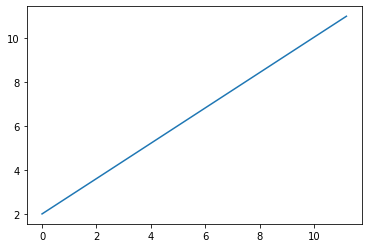

In [8]:
plt.plot(timeArr * 1e-3, angleArr)

In [11]:
espDev.CloseInstrument()

0